Implementing CNN on MNIST dataset using Tensorflow 

Each Image is 28*28 = 784 pixels in total 
We need to classify the images into 10 classes so no of output classes = 10
Each pixel has a single value mapped, indicating the darkness of the pixel in the range[0,255]
The training datasets have 785 columns, the first being label -- true value 

Test dataset contain 784 columns(obviously without label)

In [32]:
import numpy as np
import pandas as pd 
import random 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [33]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [34]:
x_train.shape

(60000, 28, 28)

In [35]:
x_test.shape

(10000, 28, 28)

In [36]:
type(x_test) 

numpy.ndarray

In [37]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

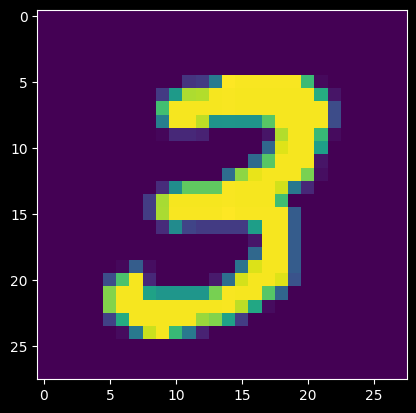

In [38]:
plt.imshow(x_train[7]) # check the image out of 60000 images 
plt.show()

In [39]:
y_train
# print(y_train[7]) return 3 

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [40]:
def CNN():
    inputs= keras.Input(shape=(28,28,1), name='Input layer')
    x = layers.Conv2D(filters= 32, kernel_size = 3, strides = (1,1) , padding='valid',  activation='relu' ,name="conv_layer_1")(inputs)
    x = layers.MaxPool2D(pool_size=2, name="pooling_1")(x)
    x = layers.Conv2D(filters= 64, kernel_size = 3, activation='relu', name="conv_layer_2")(x)
    x = layers.MaxPool2D(pool_size=2, name="pooling_2")(x)
    x = layers.Conv2D(filters= 128, kernel_size = 3, activation='relu', name="conv_layer_3")(x)
    x = layers.Flatten(name="flattening_layer")(x)
    x = layers.Dense(units= 64, activation='relu')(x)
    outputs = layers.Dense(units= 10, activation='softmax', name='output_layer')(x)

    model = keras.Model(inputs= inputs , outputs=outputs, name='CNN_model')

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', # Multi-class classification (orders, no one-hot encoding)
                  metrics=['accuracy'])

    return model

In [41]:
model = CNN()
model.summary()

Model: "CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input layer (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 conv_layer_1 (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 pooling_1 (MaxPooling2D)    (None, 13, 13, 32)        0         
                                                                 
 conv_layer_2 (Conv2D)       (None, 11, 11, 64)        18496     
                                                                 
 pooling_2 (MaxPooling2D)    (None, 5, 5, 64)          0         
                                                                 
 conv_layer_3 (Conv2D)       (None, 3, 3, 128)         73856     
                                                                 
 flattening_layer (Flatten)  (None, 1152)              0 

How parameters are calculated in CNN:
1) 1*(3*3)*32 + 32 = 320 (1 is the depth of the image, 3*3 is the size of the filter, 32 is the number of filters) and as stride is 1 we dont divide by stride(we would have got different shape)
2) 32*(3*3)*64 + 64 = 18496 (32 is the depth of the image, 3*3 is the size of the filter, 64 is the number of filters), +64 is for bias
3) 64*(3*3)*128+128 = 73856 (64 is the depth of the image, 3*3 is the size of the filter, 128 is the number of filters), +128 is for bias
1) 3*3*128 = 1152 (3*3 is the size of the filter, 128 is the number of filters)
2) 1152*64+64 = 73792 (64 is the number of filters), +64 is for bias
3) 64*10+10 = 650 (64 is the number of filters), +10 is for bias

Model Fitting